## The SIR model with two age groups

The partitioning of the population can be refined to include other attributes relevant to the disease. One of the most important of these is the age. Let us assume we partition the population into two age groups, children and adults, and label them by the index $i=1,2$. Children can catch the infection from other children or from adults; likewise, adults can catch the infection from other adults or from children. Calling their respective rates of infection $\lambda_1(t)$ and $\lambda_2(t)$ we get
\begin{align}
\lambda_1(t) = \beta(C_{11}\frac{I_1}{N_1} + C_{12}\frac{I_2}{N_2})S_1\\
\lambda_2(t) = \beta(C_{21}\frac{I_1}{N_1} + C_{22}\frac{I_2}{N_2})S_2
\end{align}
where $C_{ij}$ are contact matrices, quantifying how much each age group interacts with the other. The ordinary differential equations of this age-structured SIR model are 

\begin{align}
\dot S_i &= -\lambda_i(t)S_i \\
\dot I_i &= \lambda(t)_iI_i - \gamma I_i \\
\dot R_i &= \gamma I_i 
\end{align}

Again, for each $i$ the sum $N_i = S_i + I_i + R_i$ remains constant. What do we expect qualitatively ? The group that has a greater rate will catch the disease faster and catch more of it. This depends on how the entries of the contact matrix are distributed. 

This example below considers two cases:
* Case1: we let the epidemic run witout any intervention
* Case2: we reduce contacts between children after a time $t_1$

In [1]:
%matplotlib inline
import numpy as np
import pyross
import matplotlib.pyplot as plt

In [2]:
M  = 2                  # the population has two age groups
N  =  1000000           # and this is the total population

beta  = np.array((0.012, 0.024))          # infection rate
gIa   = 1./7            # removal rate of asymptomatic infectives 
gIs   = 1./7            # removal rate of asymptomatic infectives 
alpha = 0               # fraction of asymptomatic infectives 
fsa   = 1               # Fraction by which symptomatic individuals do not self isolate


Ni = np.zeros((M))      # population in each group
fi = np.zeros((M))      # fraction of population in age age group

# set the age structure
fi = np.array((0.25, 0.75)) 
for i in range(M):
    Ni[i] = fi[i]*N
    
    
Ia_0 = np.array((1,1))  # each age group has asymptomatic infectives
Is_0 = np.array((1,1))  # and also symptomatic infectives 
R_0  = np.array((0,0))  # there are no removed individuals initially
S_0  = Ni - (Ia_0 + Is_0 + R_0)

In [3]:
# duration of simulation and data file
Tf=300; Nf=300; filename='this.mat'

# instantiate model
parameters = {'alpha':alpha, 'beta':beta, 'gIa':gIa, 'gIs':gIs,'fsa':fsa, 'gE':1/4}
model = pyross.deterministic.SEIR(parameters, M, Ni)


def contactMatrix(t):
    return np.array(( [18., 9.], [3., 12.] ))

# simulate model
x0 = np.concatenate((S_0,0*S_0, Ia_0, Is_0))
data=model.simulator(x0, contactMatrix, Tf, Nf)
                    
                    
def contactMatrix(t):
    t1 = 30 
    if t<t1:
        return np.array(([18., 9.], [3., 12.]))
    else:
        return np.array(([0., 20.], [20., 12.]))  # now c
# simulate model
data1=model.simulator(x0, contactMatrix, Tf, Nf)           

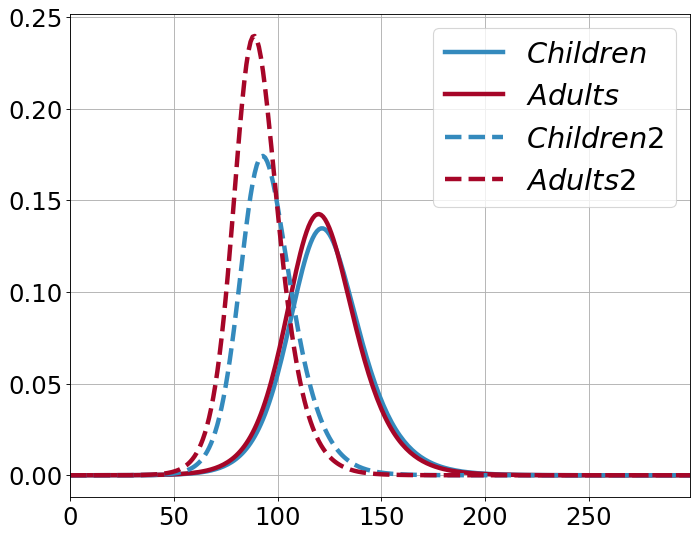

In [4]:
Is = model.Is(data)
Is1 = model.Is(data1)

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.plot(Is[:,0]/Ni[0], '-', color="#348ABD", label='$Children$', lw=4)
plt.plot(Is[:,1]/Ni[1], '-', color='#A60628', label='$Adults$', lw=4)
plt.plot(Is1[:,0]/Ni[0], '--', color="#348ABD", label='$Children 2$', lw=4)
plt.plot(Is1[:,1]/Ni[1], '--', color='#A60628', label='$Adults 2$', lw=4)


plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)

In [5]:
R1 = model.R(data)
R2 = model.R(data1)

print('Final adults recovered in case 1: ', int(R1[-1,1])) 
print('Final adults recovered in case 2: ', int(R2[-1,1])) 
print()
print('Final children recovered in case 1: ', int(R1[-1,0])) 
print('Final children recovered in case 2: ', int(R2[-1,0])) 

Final adults recovered in case 1:  669711
Final adults recovered in case 2:  743328

Final children recovered in case 1:  215409
Final children recovered in case 2:  202707
